Mounted at /content/drive
International Education Costs Dataset Preview:
          Country        City                      University  \
0             USA   Cambridge              Harvard University   
1              UK      London         Imperial College London   
2          Canada     Toronto           University of Toronto   
3       Australia   Melbourne         University of Melbourne   
4         Germany      Munich  Technical University of Munich   
..            ...         ...                             ...   
902        France  Strasbourg        University of Strasbourg   
903      Malaysia       Nilai                            USIM   
904  Saudi Arabia     Al-Ahsa          King Faisal University   
905           USA     Seattle        University of Washington   
906            UK  Nottingham        University of Nottingham   

                    Program     Level  Duration_Years  Tuition_USD  \
0          Computer Science    Master             2.0        55400   
1     

/tmp/ipython-input-357447340.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Level', y='Tuition_USD', data=intl_edu_df, estimator=np.mean, palette='viridis')


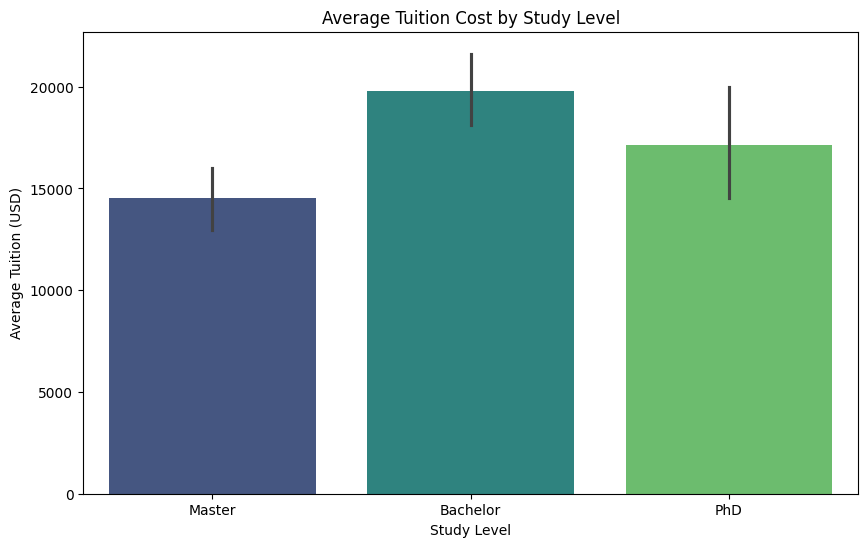

/tmp/ipython-input-357447340.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Country', y='Tuition_USD', data=intl_edu_df[intl_edu_df['Country'].isin(top_countries)], palette='viridis')


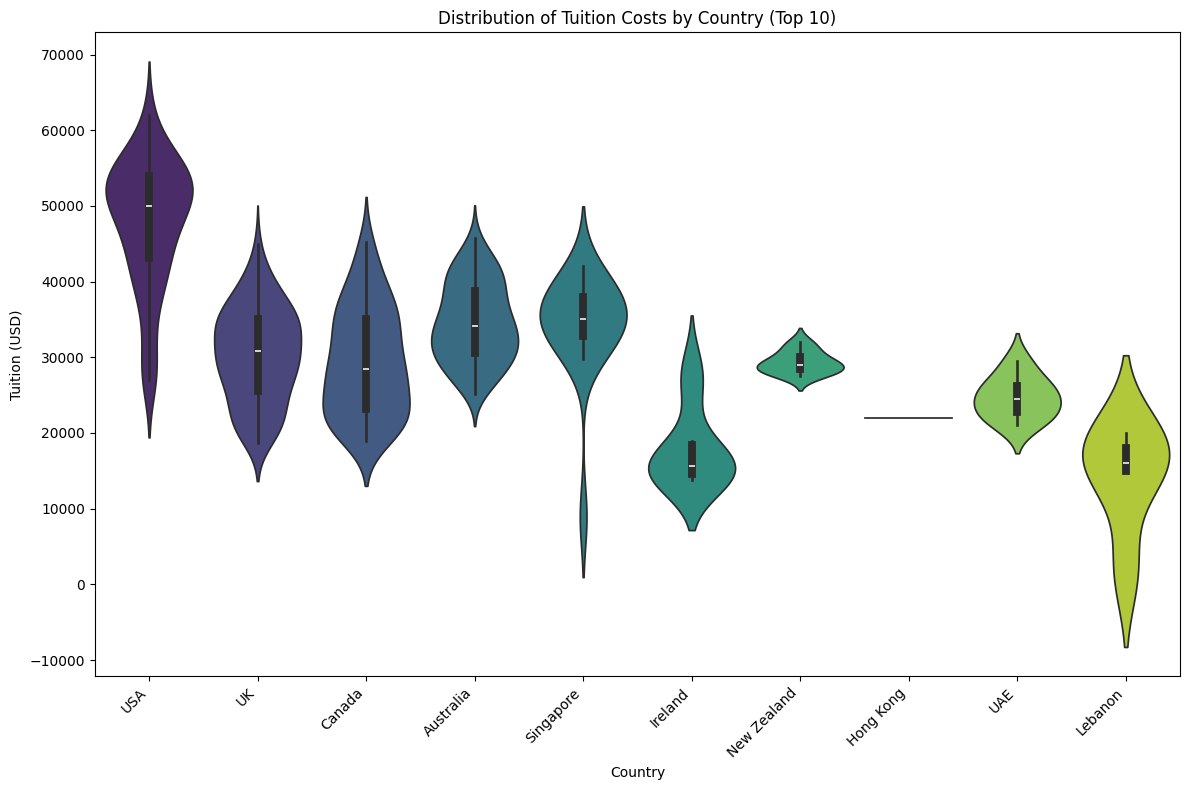

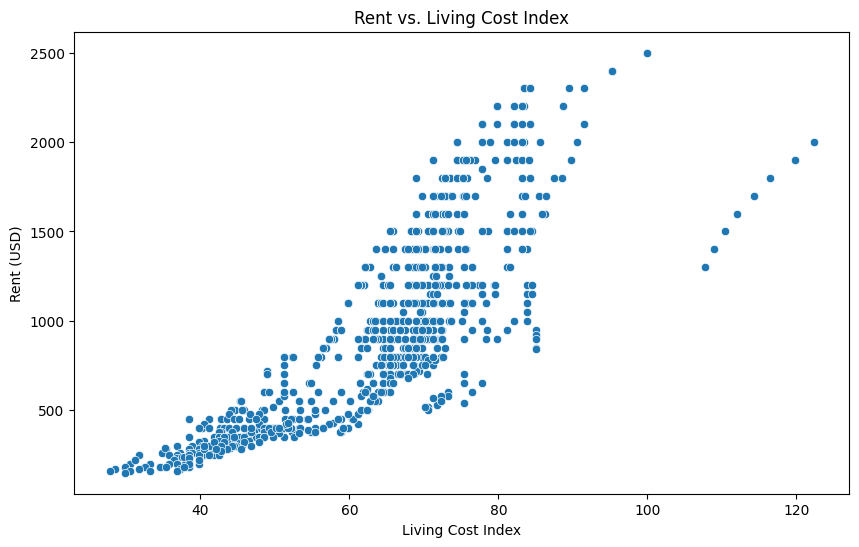

/tmp/ipython-input-357447340.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Program', data=intl_edu_df, order=intl_edu_df['Program'].value_counts().nlargest(10).index, palette='viridis')


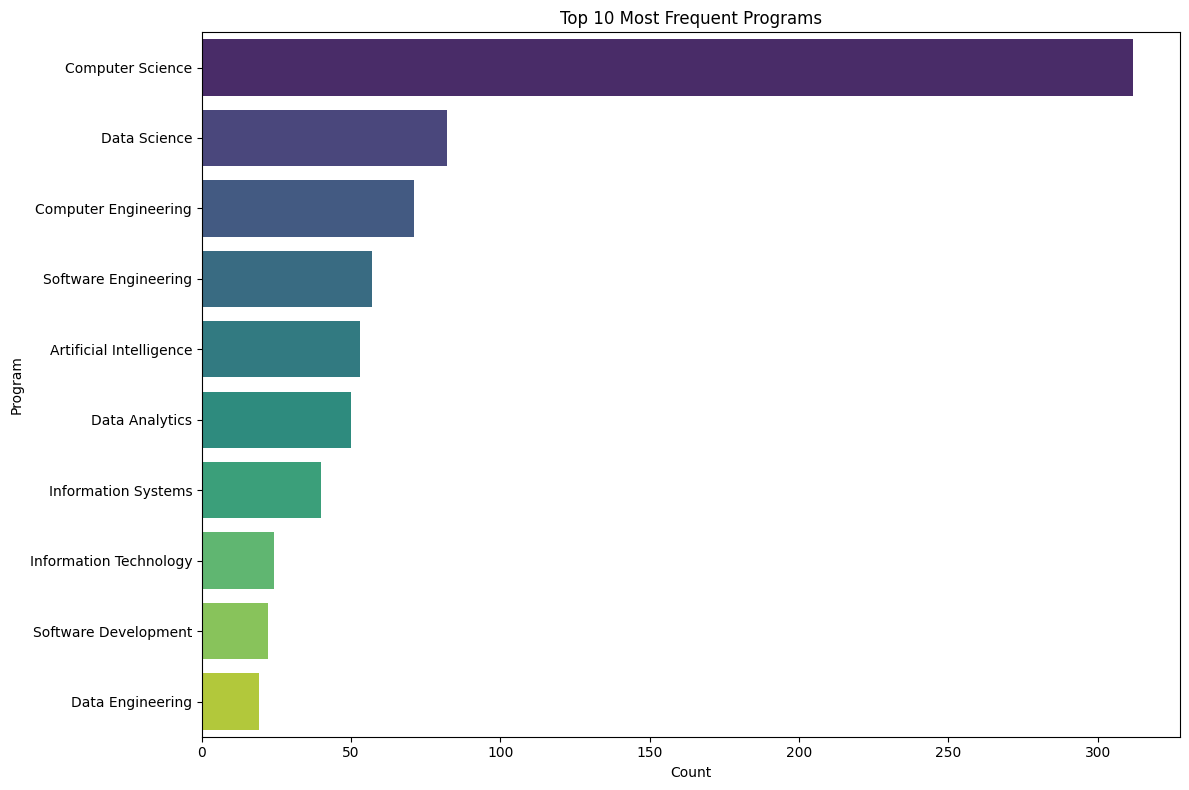

Data splitting and preprocessing complete.
Shape of X_train_processed: (725, 1350)
Shape of X_test_processed: (182, 1350)
Shape of y_train: (725,)
Shape of y_test: (182,)
Shape of X_train_original: (725, 11)
Shape of X_test_original: (182, 11)
Random Forest Regressor - Mean Squared Error: 10879682.119560441
Random Forest Regressor - R-squared: 0.9582937408216574


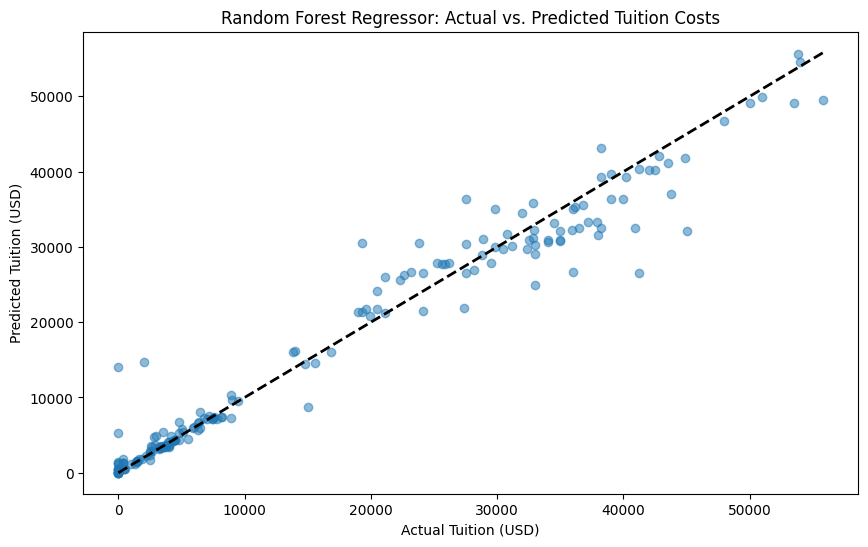

KNN Regressor - Mean Squared Error: 66997995.14285714
KNN Regressor - R-squared: 0.7431693574177487
KNN Regressor Performance:
Mean Squared Error: 66997995.14285714
R-squared: 0.7431693574177487


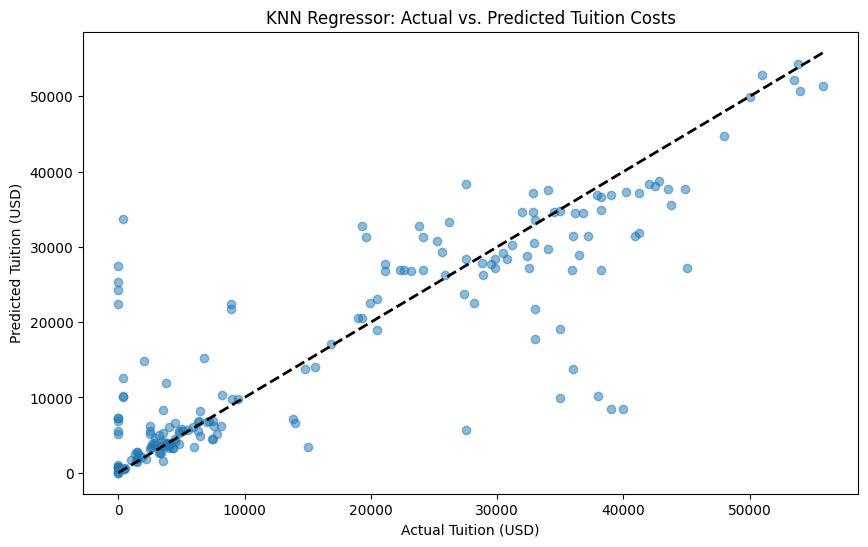

Performance Comparison of KNN and Random Forest Regressors (with Expanded Features):
KNN Regressor - Mean Squared Error: 66997995.14285714
KNN Regressor - R-squared: 0.7431693574177487
Random Forest Regressor - Mean Squared Error: 10879682.119560441
Random Forest Regressor - R-squared: 0.9582937408216574


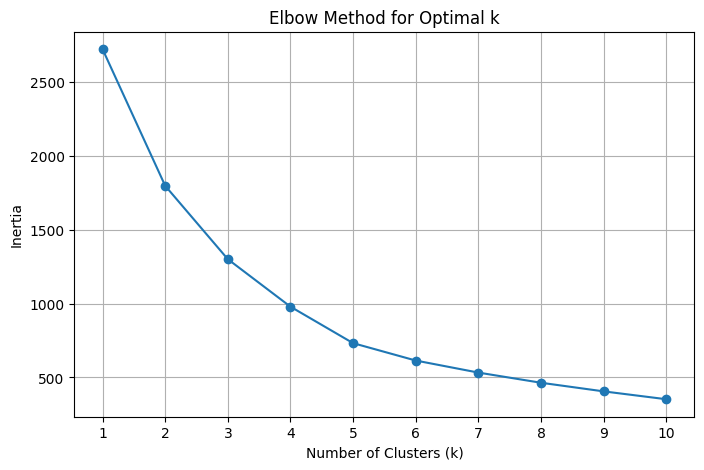


Cluster distribution:
Cluster
2    321
0    318
1    268
Name: count, dtype: int64

Cluster characteristics (mean values):
          Tuition_USD  Living_Cost_Index  Duration_Years
Cluster                                                 
0        35740.566038          71.586478        3.267296
1         4045.708955          48.519776        3.166045
2         8416.510903          70.644860        2.135514


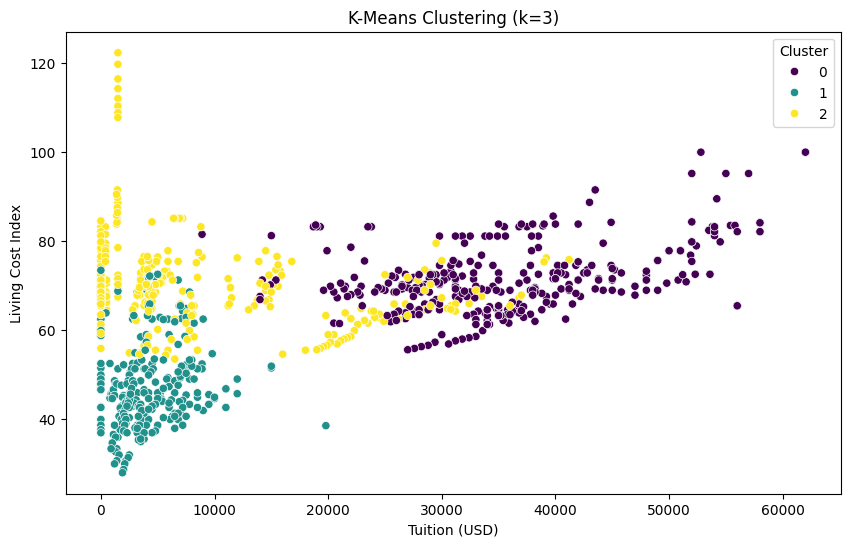


Distribution of Country within Clusters:
Country  Algeria  Argentina  Australia  Austria  Bahrain  Bangladesh  Belgium  \
Cluster                                                                         
0              0          0         80        0        0           0        0   
1              5          6          0        1        3           5        2   
2              0          0          6        8        2           0        7   

Country  Brazil  Bulgaria  Canada  ...  Thailand  Tunisia  Turkey  UAE  UK  \
Cluster                            ...                                       
0             0         0      46  ...         0        0       0    4  79   
1             7         5       0  ...         8        6       9    0   0   
2             1         0      30  ...         0        0       0    4  14   

Country  USA  Ukraine  Uruguay  Uzbekistan  Vietnam  
Cluster                                              
0         78        0        0           0        0  

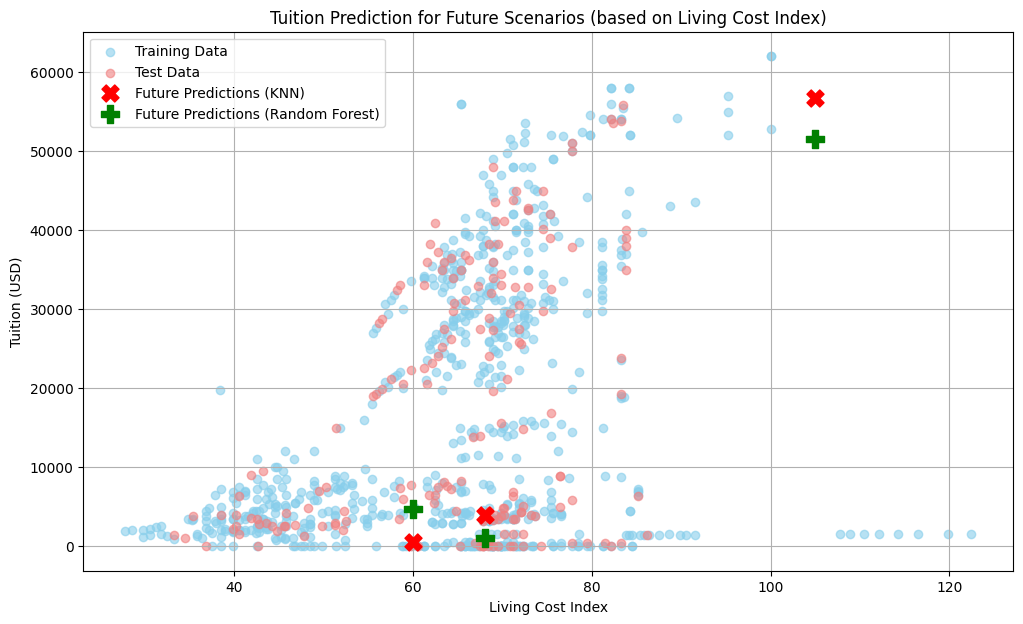

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

# Import libraries for data analysis and visualization
import pandas as pd         # Data manipulation
import numpy as np          # Numerical operations
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns      # Statistical data visualization

from google.colab import drive
drive.mount('/content/drive')

def load_data(file_path):
  file_path = '/content/drive/My Drive/International_Education_Costs/International_Education_Costs.csv'
  df = pd.read_csv(file_path)
  return df

# Preview the datasets
print("International Education Costs Dataset Preview:")
intl_edu_df = load_data('/content/drive/My Drive/International_Education_Costs.csv')
print(intl_edu_df)

# Average tuition by country
avg_tuition = intl_edu_df.groupby('Country')['Tuition_USD'].mean().sort_values(ascending=False)
avg_tuition.head()

# Impute numerical columns with the mean or median
for col in intl_edu_df.select_dtypes(include=np.number).columns:
  if intl_edu_df[col].isnull().any():
    median_val = intl_edu_df[col].median()
    intl_edu_df[col].fillna(median_val, inplace=True)

# Example: Impute categorical columns with the mode
for col in intl_edu_df.select_dtypes(include='object').columns:
  if intl_edu_df[col].isnull().any():
    mode_val = intl_edu_df[col].mode()[0]
    intl_edu_df[col].fillna(mode_val, inplace=True)

# Verify the cleaning process
print("\nDataset after cleaning:")
print(intl_edu_df.info())
print("\nMissing values after cleaning:")
print(intl_edu_df.isnull().sum())

# Handle missing values: Impute or drop based on analysis
print(intl_edu_df[['Country', 'Tuition_USD']].dropna())

print(intl_edu_df['Tuition_USD'].describe())
print(intl_edu_df['Country'].unique())

# data processing

# Summary statistics
print("\nSummary statistics after cleaning:")
print(intl_edu_df.describe(include='all'))
print("\nData Processing Complete.")



# Additional Visualizations for Better Insights

# Bar plot of Average Tuition by Level
plt.figure(figsize=(10, 6))
sns.barplot(x='Level', y='Tuition_USD', data=intl_edu_df, estimator=np.mean, palette='viridis')
plt.title('Average Tuition Cost by Study Level')
plt.xlabel('Study Level')
plt.ylabel('Average Tuition (USD)')
plt.show()

# Define top_countries again as it was not in the previous cell's scope
top_countries = intl_edu_df.groupby('Country')['Tuition_USD'].mean().sort_values(ascending=False).head(10).index

# Violin plot of Tuition Costs by Country (Top 10) - provides distribution shape
plt.figure(figsize=(12, 8))
sns.violinplot(x='Country', y='Tuition_USD', data=intl_edu_df[intl_edu_df['Country'].isin(top_countries)], palette='viridis')
plt.title('Distribution of Tuition Costs by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Tuition (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Scatter plot of Rent vs. Living Cost Index
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Living_Cost_Index', y='Rent_USD', data=intl_edu_df)
plt.title('Rent vs. Living Cost Index')
plt.xlabel('Living Cost Index')
plt.ylabel('Rent (USD)')
plt.show()

# Count plot of Programs (Top 10)
plt.figure(figsize=(12, 8))
sns.countplot(y='Program', data=intl_edu_df, order=intl_edu_df['Program'].value_counts().nlargest(10).index, palette='viridis')
plt.title('Top 10 Most Frequent Programs')
plt.xlabel('Count')
plt.ylabel('Program')
plt.tight_layout()
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Separate features (X) and target (y)
X = intl_edu_df.drop('Tuition_USD', axis=1)
y = intl_edu_df['Tuition_USD']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Create a column transformer for one-hot encoding
# Fit the preprocessor on the entire dataset before splitting
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep numerical columns as they are
)

X_processed = preprocessor.fit_transform(X)

# Convert the processed data (sparse matrix) to a dense array and then to a DataFrame
processed_feature_names = preprocessor.get_feature_names_out(X.columns)
X_processed_df = pd.DataFrame(X_processed.toarray(), columns=processed_feature_names)


# Split data into training and testing sets
X_train_processed, X_test_processed, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)

# Use original data for plotting
X_train_original, X_test_original, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)


print("Data splitting and preprocessing complete.")
print("Shape of X_train_processed:", X_train_processed.shape)
print("Shape of X_test_processed:", X_test_processed.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of X_train_original:", X_train_original.shape)
print("Shape of X_test_original:", X_test_original.shape)


# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust n_estimators
rf_model.fit(X_train_processed, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_processed)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - Mean Squared Error: {mse_rf}")
print(f"Random Forest Regressor - R-squared: {r2_rf}")

# Optional: Visualize actual vs. predicted values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Tuition (USD)")
plt.ylabel("Predicted Tuition (USD)")
plt.title("Random Forest Regressor: Actual vs. Predicted Tuition Costs")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Plotting a diagonal line
plt.show()

# Initialize and train the KNN Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5) # You can adjust n_neighbors
knn_model.fit(X_train_processed, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_processed)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regressor - Mean Squared Error: {mse_knn}")
print(f"KNN Regressor - R-squared: {r2_knn}")


# Display KNN Regressor Performance and Visualization

# Check if the KNN model and metrics exist
if 'knn_model' in locals() and 'mse_knn' in locals() and 'r2_knn' in locals():
    print("KNN Regressor Performance:")
    print(f"Mean Squared Error: {mse_knn}")
    print(f"R-squared: {r2_knn}")

    # Visualize actual vs. predicted values for KNN
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_knn, alpha=0.5)
    plt.xlabel("Actual Tuition (USD)")
    plt.ylabel("Predicted Tuition (USD)")
    plt.title("KNN Regressor: Actual vs. Predicted Tuition Costs")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Plotting a diagonal line
    plt.show()
else:
    print("KNN Regressor model and performance metrics not found. Please run the training and evaluation cell for KNN first.")

print("Performance Comparison of KNN and Random Forest Regressors (with Expanded Features):")
print(f"KNN Regressor - Mean Squared Error: {mse_knn}")
print(f"KNN Regressor - R-squared: {r2_knn}")
print(f"Random Forest Regressor - Mean Squared Error: {mse_rf}")
print(f"Random Forest Regressor - R-squared: {r2_rf}")

if 'best_rf_model' in locals():
    print(f"Tuned Random Forest Regressor - Mean Squared Error: {mse_best_rf}")
    print(f"Tuned Random Forest Regressor - R-squared: {r2_best_rf}")

#  k-Means Clustering
# Select features for clustering
features_for_clustering = ['Tuition_USD', 'Living_Cost_Index', 'Duration_Years']
X_cluster = intl_edu_df[features_for_clustering]
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)
# Determine the optimal number of clusters using the Elbow method
inertia = []
k_range = range(1, 11)  # Trying k from 1 to 10

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init to avoid warning
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Let's assume we choose k=3 as requested
optimal_k = 3

# Apply K-Means clustering with the chosen number of clusters
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
intl_edu_df['Cluster'] = kmeans_final.fit_predict(X_scaled)

# Analyze the clusters
print("\nCluster distribution:")
print(intl_edu_df['Cluster'].value_counts())

# View the characteristics of each cluster (e.g., mean of features within each cluster)
print("\nCluster characteristics (mean values):")
print(intl_edu_df.groupby('Cluster')[features_for_clustering].mean())

# Visualize the clusters (example using a scatter plot with two features and color-coding by cluster)
# You might need to choose the two most relevant features for visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tuition_USD', y='Living_Cost_Index', hue='Cluster', data=intl_edu_df, palette='viridis', legend='full')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel('Tuition (USD)')
plt.ylabel('Living Cost Index')
plt.show()

# Select categorical columns
categorical_cols = intl_edu_df.select_dtypes(include='object').columns

# Analyze the distribution of categorical features within each cluster
for col in categorical_cols:
    print(f"\nDistribution of {col} within Clusters:")
    cluster_distribution = intl_edu_df.groupby('Cluster')[col].value_counts().unstack(fill_value=0)
    print(cluster_distribution)

# --- Future Prediction with Plots using KNN and Random Forest ---

# Define future scenarios for prediction
future_scenarios = pd.DataFrame({
    'Country': ['USA', 'Germany', 'China'],
    'City': ['New York', 'Berlin', 'Shanghai'],
    'University': ['Columbia University', 'Humboldt University of Berlin', 'Fudan University'],
    'Program': ['Computer Science', 'Physics', 'Economics'],
    'Level': ['Master', 'PhD', 'Bachelor'],
    'Duration_Years': [2.0, 4.0, 3.0],
    'Living_Cost_Index': [105.0, 68.0, 60.0],
    'Rent_USD': [2600, 950, 750],
    'Visa_Fee_USD': [210, 85, 105],
    'Insurance_USD': [1250, 620, 520],
    'Exchange_Rate': [1.0, 0.95, 7.2]
})

# Apply the same preprocessing steps to the future scenarios data
# Use the preprocessor that was fitted on the training data
future_scenarios_aligned = preprocessor.transform(future_scenarios)

# Convert the processed future scenarios data to a dense array and then to a DataFrame
processed_feature_names = preprocessor.get_feature_names_out(X.columns)
future_scenarios_aligned_df = pd.DataFrame(future_scenarios_aligned.toarray(), columns=processed_feature_names)


if 'knn_model' in locals() and ('best_rf_model' in locals() or 'rf_model' in locals()) and 'future_scenarios_aligned_df' in locals():

    # KNN Model Prediction
    future_predictions_knn = knn_model.predict(future_scenarios_aligned_df)

    # Random Forest Model Prediction
    if 'best_rf_model' in locals():
        future_predictions_rf = best_rf_model.predict(future_scenarios_aligned_df)
        best_model_name = "Best Random Forest"
    elif 'rf_model' in locals():
         future_predictions_rf = rf_model.predict(future_scenarios_aligned_df)
         best_model_name = "Random Forest"
    else:
        future_predictions_rf = None
        best_model_name = "Random Forest (Model not found)"


    print("\nPredicted Tuition Costs for Future Scenarios (USD):")
    print("KNN Model:", future_predictions_knn)
    if future_predictions_rf is not None:
      print(f"{best_model_name} Model:", future_predictions_rf)


    # Visualize the original data points and the future predictions

    # Plot predictions vs. Living Cost Index
    plt.figure(figsize=(12, 7))

    # Create temporary DataFrames for plotting training and test data
    train_plot_df_lci = pd.DataFrame({'Living_Cost_Index': X_train_original['Living_Cost_Index'], 'Tuition_USD': y_train})
    test_plot_df_lci = pd.DataFrame({'Living_Cost_Index': X_test_original['Living_Cost_Index'], 'Tuition_USD': y_test})


    plt.scatter(train_plot_df_lci['Living_Cost_Index'], train_plot_df_lci['Tuition_USD'], alpha=0.6, label='Training Data', color='skyblue')
    plt.scatter(test_plot_df_lci['Living_Cost_Index'], test_plot_df_lci['Tuition_USD'], alpha=0.6, label='Test Data', color='lightcoral')


    # Plot the future prediction points from the processed future scenarios DataFrame
    plt.scatter(future_scenarios_aligned_df['remainder__Living_Cost_Index'], future_predictions_knn, color='red', marker='X', s=150, label='Future Predictions (KNN)', zorder=5)
    if future_predictions_rf is not None:
        plt.scatter(future_scenarios_aligned_df['remainder__Living_Cost_Index'], future_predictions_rf, color='green', marker='P', s=150, label=f'Future Predictions ({best_model_name})', zorder=5)


    # Add labels and title
    plt.xlabel('Living Cost Index')
    plt.ylabel('Tuition (USD)')
    plt.title('Tuition Prediction for Future Scenarios (based on Living Cost Index)')
    plt.legend()
    plt.grid(True)
    plt.show()



else:
    print("Required models or future scenarios data not found. Please ensure you have trained the models and defined 'future_scenarios_aligned'.")